In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

**3. How closely does lateness (ADHERENCE) correlate to headway?**

Independent variable belongs on the x-axis and dependent variable belongs on the y-axis.

- Target/ dependent variable (variable you're trying to predict) - headway deviation.
- Predictor/ independent variable (variable you use to make prediction) - adherence. 

Reminder that: 
- ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time.
- HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping). 

In [2]:
headway_data = pd.read_csv("../data/headway_data.csv", delimiter = '\t')
headway_data.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,112,0.000000,-0.258889


**Correlation Coefficient**

In [4]:
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(headway_data['ADHERENCE'], headway_data['HDWY_DEV'])

# Print the correlation coefficient
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: -0.20682243927838445


There seems to be a weak inverse relationship between ADHERENCE (amount of time was early or behind departure schedule) and HDWY_DEV (amount of time you wait at a stop in between buses). The negative means that as one variable increases, the other tends to decrease and vice versa. 

**Scatter Plots** - Work with a subset of the data

In [5]:
subset = headway_data.iloc[:49]
# subset.to_csv('../data/subset.csv', sep='\t' , index=False)
subset.head(3)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222


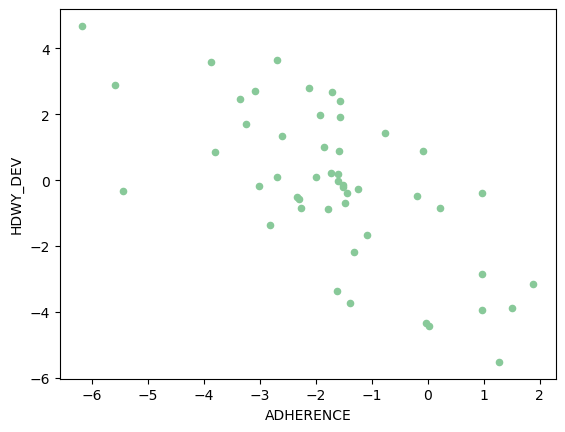

In [6]:
subset.plot.scatter(x = 'ADHERENCE', y = 'HDWY_DEV', s = 20, color = '#88c999'); 

In [7]:
# Filter the DataFrame for positive and neutral adherence values
positive_adherence = subset[subset['ADHERENCE'] > 1]
neutral_adherence = subset[(subset['ADHERENCE'] > -1) & (subset['ADHERENCE'] < 1)]
negative_adherence = subset[subset['ADHERENCE'] < -1]

# Calculate statistics for both subsets
positive_stats = positive_adherence['HDWY_DEV'].describe()
neutral_stats = neutral_adherence['HDWY_DEV'].describe()
negative_stats = negative_adherence['HDWY_DEV'].describe()

# Create a DataFrame with the combined statistics
sample_adherence_stats = pd.DataFrame({
    'Adherence Type': ['Positive', 'Neutral', 'Negative'],
    'Count': [positive_stats['count'], neutral_stats['count'], negative_stats['count']],
    'Mean': [positive_stats['mean'], neutral_stats['mean'], negative_stats['mean']],
    'Std': [positive_stats['std'], neutral_stats['std'], negative_stats['std']],
    'Min': [positive_stats['min'], neutral_stats['min'], negative_stats['min']],
    '25%': [positive_stats['25%'], neutral_stats['25%'], negative_stats['25%']],
    '50%': [positive_stats['50%'], neutral_stats['50%'], negative_stats['50%']],
    '75%': [positive_stats['75%'], neutral_stats['75%'], negative_stats['75%']],
    'Max': [positive_stats['max'], neutral_stats['max'], negative_stats['max']]
})

# Display the DataFrame
sample_adherence_stats

,Adherence Type,Count,Mean,Std,Min,25%,50%,75%,Max
0,Positive,3.0,-4.183334,1.211519,-5.516667,-4.70,-3.883334,-3.516667,-3.150000
1,Neutral,9.0,-1.659260,2.270709,-4.416667,-3.95,-0.850000,-0.383334,1.433333
2,Negative,37.0,0.564865,1.909741,-3.716667,-0.50,0.100000,1.966666,4.683333


This graphs shows that: 
- When the bus leaves before the scheduled departure time (positive ADHERENCE), the average time in minutes between the actual and scheduled headway (HDWY_DEV) is 4 minutes shorter (negative HDWY_DEV). 
- When the bus leaves about on time (neutral adherence), the avg waiting time between buses decreases by 1 min and a half (neg HDWY_DEV). 
- When the bus leaves after the scheduled departure time (negative ADHERENCE), the avg waiting time between is about the same (neutral HDWY_DEV). 

**Scatter Plots** - Apply this to original data

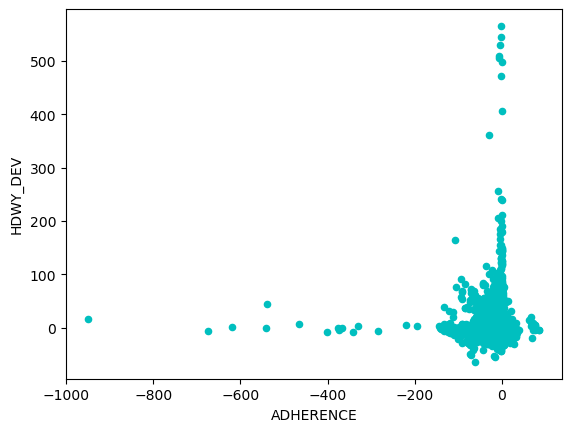

In [8]:
headway_data.plot.scatter(x = 'ADHERENCE', y = 'HDWY_DEV', s = 20, color = 'c'); #cyan

In [9]:
# Filter the DataFrame for positive and neutral adherence values
positive_adherence = headway_data[headway_data['ADHERENCE'] > 1]
neutral_adherence = headway_data[(headway_data['ADHERENCE'] > -1) & (headway_data['ADHERENCE'] < 1)]
negative_adherence = headway_data[headway_data['ADHERENCE'] < -1]

# Calculate statistics for both subsets
positive_stats = positive_adherence['HDWY_DEV'].describe()
neutral_stats = neutral_adherence['HDWY_DEV'].describe()
negative_stats = negative_adherence['HDWY_DEV'].describe()

# Create a DataFrame with the combined statistics
adherence_stats = pd.DataFrame({
    'Adherence Type': ['Positive', 'Neutral', 'Negative'],
    'Count': [positive_stats['count'], neutral_stats['count'], negative_stats['count']],
    'Mean': [positive_stats['mean'], neutral_stats['mean'], negative_stats['mean']],
    'Std': [positive_stats['std'], neutral_stats['std'], negative_stats['std']],
    'Min': [positive_stats['min'], neutral_stats['min'], negative_stats['min']],
    '25%': [positive_stats['25%'], neutral_stats['25%'], negative_stats['25%']],
    '50%': [positive_stats['50%'], neutral_stats['50%'], negative_stats['50%']],
    '75%': [positive_stats['75%'], neutral_stats['75%'], negative_stats['75%']],
    'Max': [positive_stats['max'], neutral_stats['max'], negative_stats['max']]
})

# Display the DataFrame
adherence_stats

,Adherence Type,Count,Mean,Std,Min,25%,50%,75%,Max
0,Positive,8819.0,-3.695143,5.446979,-33.150000,-5.966667,-3.483334,-1.750000,78.050000
1,Neutral,72111.0,-1.677035,5.946462,-32.866667,-3.550000,-1.483334,-0.100000,498.066666
2,Negative,183992.0,1.590440,7.396909,-64.000000,-1.200000,1.166666,3.633333,565.433333


**Linear Regression Model**

lm = smf.ols('target variable ~ predictor variable', data = df).fit()

lm.summary()

In [10]:
lm = smf.ols('HDWY_DEV ~ ADHERENCE', data = headway_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HDWY_DEV   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:32:41   Log-Likelihood:            -8.9492e+05
No. Observations:              265884   AIC:                         1.790e+06
Df Residuals:                  265882   BIC:                         1.790e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2802      0.015    -18.151      0.000      -0.310      -0.250
ADHERENCE     -0.2279      0.002   -109.002      0.000      -0.232      -0.224
==============================================================================
Omnibus:                   525134.358   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       9643452394.096
Skew:                          15.113   Prob(JB):                         0.00
Kurtosis:                     935.498   Cond. No.                         8.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The **intercept** is the predicted value of 'HDWY_DEV' when 'ADHERENCE' is zero.

For every one-minute change in 'ADHERENCE', 'HDWY_DEV' is expected to change by approximately -0.2279 minutes (or about 13.7 seconds) . The negative sign means that as 'ADHERENCE' increases (the bus leaves before the scehduled time), 'HDWY_DEV' is expected to decrease (become more negative).